**Linear Regression**


In [1]:
# Numpy for data management
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# Pandas also for data management
import pandas as pd
import io
# Seaborn for plotting and styling
import seaborn as sns

from scipy import stats
import statsmodels.api as sm

df2 = pd.read_csv('data_selection.csv',sep=',')
sns.set()
data=df2.to_numpy()
cols = ['No','year','month','day','hour','PM2.5','PM10','SO2','NO2','CO','O3','TEMP','PRES','DEWP','RAIN','WSPM']

df2 = pd.DataFrame(data, columns=cols)


**Linear Regression between CO and WSPM**

**a)** *Select two features in your dataset with more or less “linear‐like” scatterplot. Display the scatter‐plot, and make a comment on it.*

In [2]:
# select columns "wind speed per minunte" (WSPM) and "Ozone" (O3)
x=df2['WSPM'].to_numpy()
x=np.reshape(x,(-1,1))
y=df2['O3'].to_numpy()


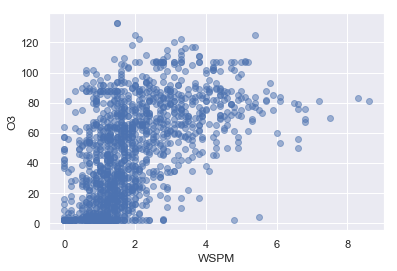

In [3]:
ax = sns.regplot(x=x, y=y, fit_reg=False, scatter_kws={'alpha':0.5})
ax.set(xlabel='WSPM', 
       ylabel='O3');
ax.figure.savefig("scatter_plot.svg")


**b)** *Build a linear regression of one of the features over the other. Obtain a normal probability plot of the standardized residuals from this regression. Does the normal probability plot indicate acceptable normality, or is there any skewness? If a skewness, what is the type of it?*

In [4]:
from numpy.linalg import inv
from numpy.linalg import det
from numpy import dot

In [5]:
# calculate beta for the linear regression
beta = np.linalg.lstsq(x, y)[0]

print(beta)

[20.80505004]


C:\Users\Bekki\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


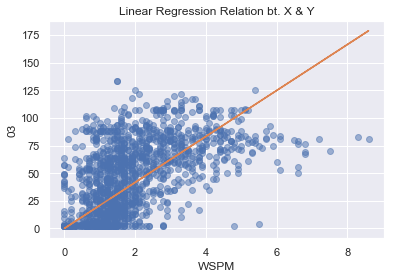

In [6]:
# calculate the predictions
predictions = x* beta 
predictions_withouth_intercept = predictions

ax = sns.regplot(x=x, y=y, fit_reg=False, scatter_kws={'alpha':0.5})
ax.set(xlabel='WSPM', 
       ylabel='03',
       title='Linear Regression Relation bt. X & Y');

# plot the linear regression line over the plot  
plt.plot(x, predictions) 
plt.show()

C:\Users\Bekki\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  if __name__ == '__main__':


Estimated coefficients: [22.08067686 13.00532788]


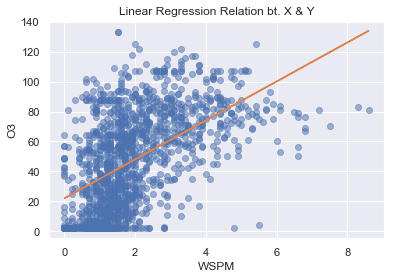

In [7]:
# improve the fit of the regression line
x=df2['WSPM'].to_numpy()
y=df2['O3'].to_numpy()

constant_term = np.ones(len(x)) 
# append constant term as a column of x
x = np.c_[constant_term, x]

beta = np.linalg.lstsq(x, y)[0]
print('Estimated coefficients:', beta)
# reshape beta 
beta = np.reshape(beta,(-1,1))

# compute new predictions
predictions_with_intercept = dot(x,beta) 

ax = sns.regplot(x=x[:,1], y=y, fit_reg=False, scatter_kws={'alpha':0.5})
ax.set(xlabel='WSPM', 
       ylabel='O3',
       title='Linear Regression Relation bt. X & Y');
plt.plot(x[:,1], predictions_with_intercept) # overlay a line plot over a scatter plot 
plt.show()
ax.figure.savefig("adapted_regression_line.svg")

In [8]:
# calculate residuals and coefficient of determination 

### SSTotal
def ss_total(y):
    mean=np.mean(y)
    total= np.sum((y-mean)**2)
    return total

# The regression sum of squares, also called the explained sum of squares:
def ss_reg(pred, y):
    mean= np.mean(y)
    ssr= np.sum((pred-mean)**2)
    return ssr

# The sum of squares of residuals, also called the residual sum of squares:
def ss_res(pred, y):
    sst=np.sum((pred-y)**2)
    return sst

# SStotal
sstotal = ss_total(y)

ss_total_using_variance = (len(y) - 1 ) * np.var(y, ddof=1) 

# SSReg
ssreg = ss_reg(predictions_with_intercept, y)

# SSRes
ssres = ss_res(predictions_with_intercept, y)

### R^2
rsq_with_intercept = 1 - (ssreg / sstotal)


print('SStotal:', round(sstotal,4))
print('SSreg:', round(ssreg,4))
print('SSres:', round(ssres,4))

print('Coefficient of Determinacy, model with intercept:', np.round(rsq_with_intercept,2))

SStotal: 1422247.2873
SSreg: 393435.3509
SSres: 2471144070.5664
Coefficient of Determinacy, model with intercept: 0.72


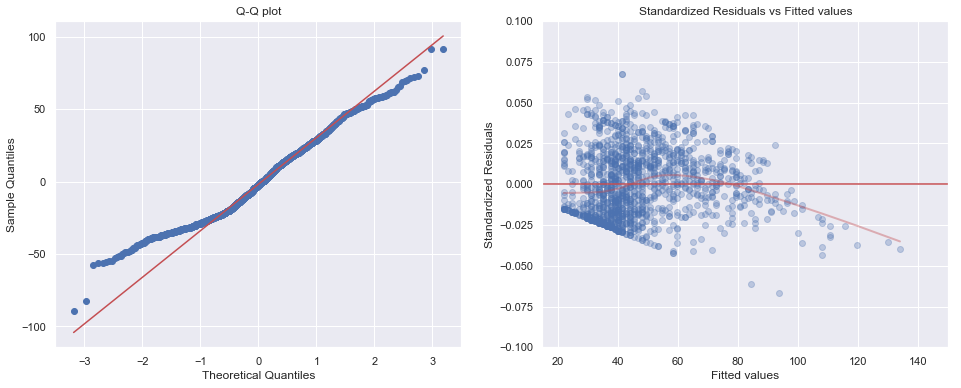

In [9]:
#make normalization plot and plot of residuals vs fits

fig, axs = plt.subplots(ncols=2, # Set the number of columns to split the figure in
                        figsize=(16, 6)) # size of the whole figure

# re-computing our model values
predictions = dot(x,beta)
residuals = y - predictions[:,0]
degrees_of_freedom = len(y) - x.shape[1]
x_val = x[:,1]

sm.qqplot(residuals, 
          stats.t,
          distargs=(degrees_of_freedom,), 
          line='q', 
          ax=axs[0])
axs[0].set_title(label = 'Q-Q plot')
axs[0].set_xlim(-3.5,3.5)

residuals_standard_error = np.sqrt(ssres / degrees_of_freedom)
mean_independent_variable = np.sum(x_val)/len(x_val)
leverage = (1 / len(x_val)) +   (x_val-mean_independent_variable)**2\
                                    /np.sum((x_val-mean_independent_variable)**2) 
leverage = np.reshape(leverage,(-1,1))
s_resid = residuals_standard_error * np.sqrt(1-leverage)
standardized_rediduals = residuals / s_resid[:,0]
ax1=sns.regplot(x=predictions[:,0], 
            y=standardized_rediduals, 
            ax=axs[1],
            lowess=True, 
            scatter_kws={'alpha':0.3}, 
            line_kws={"color":"r","alpha":0.4,"lw":2})
ax1.figure.savefig("normal_probabilty_plot.svg")

plt.plot(np.arange(len(standardized_rediduals)), [0]*len(standardized_rediduals), 'r-')
axs[1].set_ylim(-0.1,0.1)
axs[1].set_xlim(15, 150)
axs[1].set(ylabel='Standardized Residuals', 
           xlabel='Fitted values');
axs[1].set_title(label = 'Standardized Residuals vs Fitted values');
axs[1].figure.savefig("stand_vs_fitted_values.svg")

**c)** *Take the natural log of both of the variables and perform a linear regression on the transformed features. Obtain a normal probability plot of the standardized residuals from this regression. Discuss if this probability plot indicates an acceptable level of normality?*

In [10]:
x=df2['WSPM'].to_numpy()
x=np.reshape(x,(-1,1))
y=df2['O3'].to_numpy()

mask = y != 0
y_masked = y[mask]

x_masked = x[mask]

y_masked = np.log(y_masked)

Estimated coefficients: [1.33466911]
Estimated coefficients: [1.33466911]


C:\Users\Bekki\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


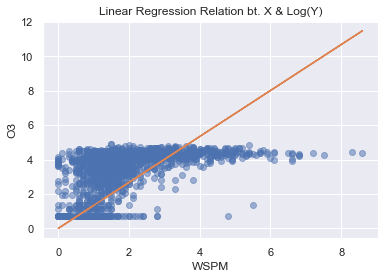

In [11]:
# estimate the coefficients
beta_log = np.linalg.lstsq(x_masked, y_masked)[0]
beta2_log = dot(dot(inv(dot(x_masked.T, x_masked)),x_masked.T),y_masked) 
print('Estimated coefficients:', beta_log)
print('Estimated coefficients:', beta2_log)

beta_log = np.reshape(beta_log,(-1,1))

# compute new predictions
predictions_log = dot(x_masked,beta_log) 

ax = sns.regplot(x=x_masked, y=y_masked, fit_reg=False, scatter_kws={'alpha':0.5})
ax.set(xlabel='WSPM', 
       ylabel='O3',
       title='Linear Regression Relation bt. X & Log(Y)');
plt.plot(x_masked, predictions_log) # overlay a line plot over a scatter plot 
plt.show()

#NORMAL DISTRIBUTION

C:\Users\Bekki\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  if __name__ == '__main__':


(1361, 2)
Estimated coefficients: [2.52616222 0.44233399]
Old shape of coefficients array: (2,)
New shape of coefficients array: (2, 1)


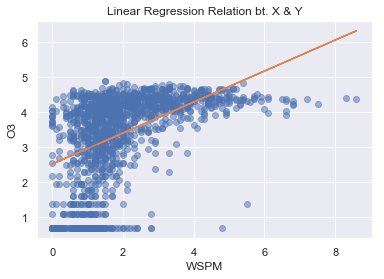

In [12]:

constant_term = np.ones(len(x_masked)) 
# append constant term as a column of x
x_masked = np.c_[constant_term, x_masked]

print(x_masked.shape)


beta_log = np.linalg.lstsq(x_masked, y_masked)[0]
print('Estimated coefficients:', beta_log)

# to use the dot product function we have to state that the coefficients vector is of the shape (2,1)
print('Old shape of coefficients array:',beta_log.shape)
beta_log = np.reshape(beta_log,(-1,1))
print('New shape of coefficients array:',beta_log.shape)

# compute new predictions
predictions_with_intercept_log = dot(x_masked,beta_log) 

ax = sns.regplot(x=x_masked[:,1], y=y_masked, fit_reg=False, scatter_kws={'alpha':0.5})
ax.set(xlabel='WSPM', 
       ylabel='O3',
       title='Linear Regression Relation bt. X & Y');
plt.plot(x_masked[:,1], predictions_with_intercept_log) # overlay a line plot over a scatter plot 
plt.show()

In [13]:
#y_masked = np.reshape(y_masked, (-1,1))
# SStotal
sstotal_log = ss_total(y_masked)

# We could also obtain SStotal using the target's variance
# don't forget to get an unbiased estimate of the variance 
ss_total_using_variance_log = (len(y_masked) - 1 ) * np.var(y_masked, ddof=1) 
# SSReg
ssreg_log = ss_reg(predictions_with_intercept_log[:,0], y_masked)
# SSRes
ssres_log = ss_res(predictions_with_intercept_log[:,0], y_masked)

### R^2
rsq_with_intercept_log = 1 - (ssres_log / sstotal_log)


print('SStotal:', round(sstotal_log,4))
print('SSreg:', round(ssreg_log,4))
print('SSres:', round(ssres_log,4))
print('Coefficient of Determinacy, model with intercept:', rsq_with_intercept_log)

SStotal: 2033.1591
SSreg: 455.1257
SSres: 1578.0333
Coefficient of Determinacy, model with intercept: 0.22385151616667542


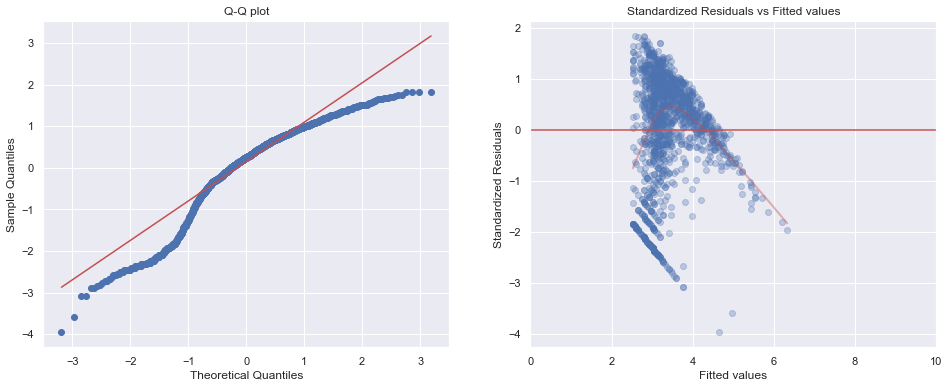

In [14]:
#x=x_masked
#y=y_masked
fig, axs = plt.subplots(ncols=2, # Set the number of columns to split the figure in
                        figsize=(16, 6)) # size of the whole figure

# re-computing our model values
predictions_log = dot(x_masked,beta_log)
residuals_log = y_masked - predictions_log[:,0]
#residuals = y - predictions
degrees_of_freedom_log = len(y_masked) - x_masked.shape[1]

sm.qqplot(residuals_log, 
          stats.t,
          distargs=(degrees_of_freedom_log,), 
          line='q', 
          ax=axs[0])
axs[0].set_title(label = 'Q-Q plot')
axs[0].set_xlim(-3.5,3.5)

#residuals_standard_error = np.sqrt(ssres/(len(x)-1-1))
residuals_standard_error_log = np.sqrt((1/degrees_of_freedom_log)*np.sum(residuals_log**2))
#mean_independent_variable = np.sum(x)/len(x)
mean_independent_variable_log = np.mean(x_masked[:,1])

leverage_log = (1/len(x_masked))+(((x_masked[:,1]-mean_independent_variable_log)**2)/(np.sum((x_masked[:,1]-mean_independent_variable_log)**2)))
standardized_rediduals_log = np.divide(residuals_log,(np.sqrt(1-leverage_log)))
predictions_log = np.reshape(predictions_log, (-1,1))

sns.regplot(x=predictions_log[:,0], 
            y=standardized_rediduals_log, 
            ax=axs[1],
            lowess=True, 
            scatter_kws={'alpha':0.3}, 
            line_kws={"color":"r","alpha":0.4,"lw":2})
plt.plot(np.arange(len(standardized_rediduals_log)), [0]*len(standardized_rediduals_log), 'r-')
#axs[1].set_ylim(-3.5,3.5)
axs[1].set_xlim(0.0,10.0)

axs[1].set(ylabel='Standardized Residuals', 
           xlabel='Fitted values');
axs[1].set_title(label = 'Standardized Residuals vs Fitted values');
axs[1].figure.savefig("normal_plot_log.svg")

As our results are not yet good enough, we use the log function on both variables and try to improve the results. 

In [15]:
# use log for x and y 
x=df2['WSPM'].to_numpy()
y=df2['O3'].to_numpy()

mask_temp = y != 0
y_masked_temp = y[mask_temp]
x_masked_temp = x[mask_temp]

mask_x_temp=x_masked_temp!=0

x_masked_ln=x_masked_temp[mask_x_temp]
y_masked_ln=y_masked_temp[mask_x_temp]


y_masked_ln= np.log(y_masked_ln)
x_masked_ln=np.log(x_masked_ln)
x_masked_ln=np.reshape(x_masked_ln,(-1,1))

Estimated coefficients: [2.896579]


C:\Users\Bekki\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


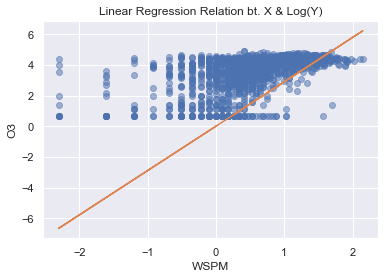

In [16]:
# estimate the coefficients for ln(x) and ln(y)
beta_ln = np.linalg.lstsq(x_masked_ln, y_masked_ln)[0]
print('Estimated coefficients:', beta_ln)

beta_ln = np.reshape(beta_ln,(-1,1))

# compute new predictions
predictions_ln = dot(x_masked_ln,beta_ln) 

ax = sns.regplot(x=x_masked_ln, y=y_masked_ln, fit_reg=False, scatter_kws={'alpha':0.5})
ax.set(xlabel='WSPM', 
       ylabel='O3',
       title='Linear Regression Relation bt. X & Log(Y)');
plt.plot(x_masked_ln, predictions_ln) # overlay a line plot over a scatter plot 
plt.show()

#NORMAL DISTRIBUTION

C:\Users\Bekki\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  import sys


(1337, 2)
Estimated coefficients: [2.98249839 0.89626032]
Old shape of coefficients array: (2,)
New shape of coefficients array: (2, 1)


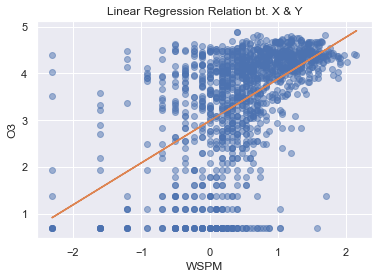

In [17]:
constant_term_ln = np.ones(len(x_masked_ln))

# append constant term as a column of x
x_masked_ln = np.c_[constant_term_ln, x_masked_ln]
print(x_masked_ln.shape)

beta_ln = np.linalg.lstsq(x_masked_ln, y_masked_ln)[0]
print('Estimated coefficients:', beta_ln)

# to use the dot product function we have to state that the coefficients vector is of the shape (2,1)
print('Old shape of coefficients array:',beta_ln.shape)
beta_ln = np.reshape(beta_ln,(-1,1))
print('New shape of coefficients array:',beta_ln.shape)

# compute new predictions
predictions_with_intercept_ln = dot(x_masked_ln,beta_ln) 

ax = sns.regplot(x=x_masked_ln[:,1], y=y_masked_ln, fit_reg=False, scatter_kws={'alpha':0.5})
ax.set(xlabel='WSPM', 
       ylabel='O3',
       title='Linear Regression Relation bt. X & Y');
plt.plot(x_masked_ln[:,1], predictions_with_intercept_ln) # overlay a line plot over a scatter plot 
plt.show()

In [18]:
#y_masked = np.reshape(y_masked, (-1,1))
# SStotal
sstotal_ln = ss_total(y_masked_ln)

# We could also obtain SStotal using the target's variance
# don't forget to get an unbiased estimate of the variance 
ss_total_using_variance_ln = (len(y_masked_ln) - 1 ) * np.var(y_masked_ln, ddof=1) 
# SSReg
ssreg_ln = ss_reg(predictions_with_intercept_ln[:,0], y_masked_ln)
# SSRes
ssres_ln = ss_res(predictions_with_intercept_ln[:,0], y_masked_ln)

### R^2
rsq_with_intercept_ln = 1 - (ssres_ln / sstotal_ln)


print('SStotal:', round(sstotal_ln,4))
print('SSreg:', round(ssreg_ln,4))
print('SSres:', round(ssres_ln,4))
print('Coefficient of Determinacy, model with intercept:', rsq_with_intercept_ln)

SStotal: 1960.0658
SSreg: 519.392
SSres: 1440.6738
Coefficient of Determinacy, model with intercept: 0.26498701060738183


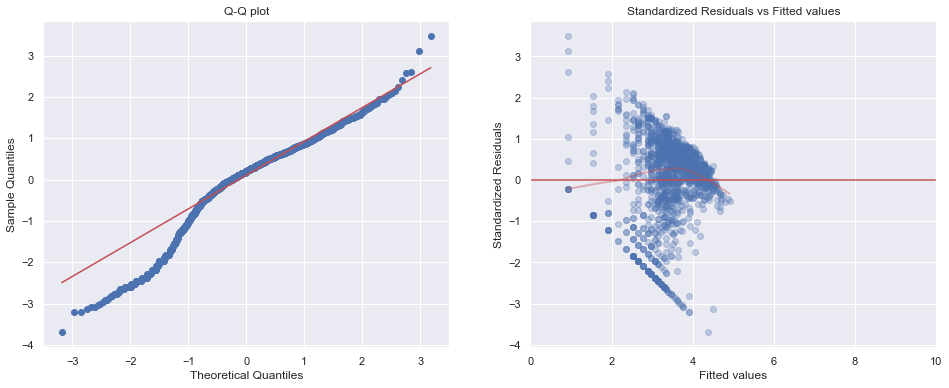

In [19]:
# computer normality plot and residuals vs. fit for linear regression of ln(O3) and ln(WSPM)
fig, axs = plt.subplots(ncols=2, 
                        figsize=(16, 6)) 

# re-computing our model values
predictions_ln = dot(x_masked_ln,beta_ln)
residuals_ln = y_masked_ln - predictions_ln[:,0]
#residuals = y - predictions
degrees_of_freedom_ln= len(y_masked_ln) - x_masked_ln.shape[1]

sm.qqplot(residuals_ln, 
          stats.t,
          distargs=(degrees_of_freedom_ln,), 
          line='q', 
          ax=axs[0])
axs[0].set_title(label = 'Q-Q plot')
axs[0].set_xlim(-3.5,3.5)

#residuals_standard_error = np.sqrt(ssres/(len(x)-1-1))
residuals_standard_error_ln= np.sqrt((1/degrees_of_freedom_ln)*np.sum(residuals_ln**2))
#mean_independent_variable = np.sum(x)/len(x)
mean_independent_variable_ln = np.mean(x_masked_ln[:,1])

leverage_ln= (1/len(x_masked_ln))+(((x_masked_ln[:,1]-mean_independent_variable_ln)**2)/(np.sum((x_masked_ln[:,1]-mean_independent_variable_ln)**2)))
standardized_rediduals_ln = np.divide(residuals_ln,(np.sqrt(1-leverage_ln)))
predictions_ln = np.reshape(predictions_ln, (-1,1))

sns.regplot(x=predictions_ln[:,0], 
            y=standardized_rediduals_ln, 
            ax=axs[1],
            lowess=True, 
            scatter_kws={'alpha':0.3}, 
            line_kws={"color":"r","alpha":0.4,"lw":2})
plt.plot(np.arange(len(standardized_rediduals_ln)), [0]*len(standardized_rediduals_ln), 'r-')
#axs[1].set_ylim(-3.5,3.5)
axs[1].set_xlim(0.0,10.0)

axs[1].set(ylabel='Standardized Residuals', 
           xlabel='Fitted values');
axs[1].set_title(label = 'Standardized Residuals vs Fitted values');
axs[1].figure.savefig("normal_plot_log_log.svg")

**d)** *Write the population regression equation for your model. Interpret the meaning of the values of the parameters b0 and b1.*

In [20]:
# Linear regression equation: "Y= b0+ b1*x "
# from now on we work with the values of ln(x) and ln(y) because we get the best results from here
print('ŷ''={}+{}*x'.format(beta_ln[0][0],beta_ln[1][0]))


# we test the equation with a value and check in the graphic if the values are sensful
test=beta_ln[0][0]+beta_ln[1][0]*np.log(4)

print("Test O3 result for WSPM 4:",np.exp(test))


ŷ=2.982498390755662+0.8962603202391964*x
Test O3 result for WSPM 4: 68.37306898438948


**e)** *Find the correlation and determinacy coefficients. Analyse and comment on the meaning of both.*

In [21]:
# recompute values of ln(x) and ln(y) to have the right shapes again
x=df2['WSPM'].to_numpy()
y=df2['O3'].to_numpy()
mask_temp = y != 0
y_masked_temp = y[mask_temp]
x_masked_temp = x[mask_temp]
mask_x_temp=x_masked_temp!=0
x_masked_ln=x_masked_temp[mask_x_temp]
y_masked_ln=y_masked_temp[mask_x_temp]
y_masked_ln= np.log(y_masked_ln)
x_masked_ln=np.log(x_masked_ln)
x_masked_ln=np.reshape(x_masked_ln,(-1,1))

#compute the correlation coefficient and the coefficient of the determinancy

constant_term_ln = np.ones(len(x_masked_ln)) 
# append constant term as a column of x
x_masked_ln= np.c_[constant_term_ln, x_masked_ln]

print("Coefficient of Determination:",rsq_with_intercept_ln)
print('Correlation:',np.sqrt(rsq_with_intercept_ln))
print('Correlation:',np.corrcoef(y_masked_ln,x_masked_ln[:,1])[0,1])

#test if our result is corrected
from sklearn.metrics import r2_score
print('Coefficient of Determinacy:',round(r2_score(y_true=y_masked_ln, y_pred=predictions_with_intercept_ln),2))


Coefficient of Determination: 0.26498701060738183
Correlation: 0.5147688904813322
Correlation: 0.5147688904813325
Coefficient of Determinacy: 0.26


**f)** *Test the statistical hypothesis for determining whether a linear relationship exists between the chosen variables.*

In [22]:
n_ln = len(x_masked_ln[:,1])
sigma_degrees_of_freedom_ln = n_ln - 2
# mean squared error
sigma_sqr_ln = ssres_ln/ sigma_degrees_of_freedom_ln
variance_covmatrix_ln = inv((np.matmul(x_masked_ln.T,x_masked_ln)))*sigma_sqr_ln
coeff_stde_ln = [np.sqrt(variance_covmatrix_ln[0,0]),np.sqrt(variance_covmatrix_ln[1,1])]
print('Coefficients\' Standard Errors:',coeff_stde_ln)

Coefficients' Standard Errors: [0.03444818325711345, 0.040853451226532896]


In [23]:
expected_value3 = 0.0

# For each coefficient
for i in range(len(beta_ln)):    
    ttest_ln =np.divide((beta_ln[i]),coeff_stde_ln[i])

    #Degrees of freedom
    df_ln = x_masked_ln.shape[0] - (i+1)
    # https://stats.stackexchange.com/a/140395
    
    pval_ln = stats.t.sf(np.abs(ttest_ln), df_ln)*2  # two-sided pvalue = Prob(abs(t)>tt)
    # https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html#t-test-and-ks-test
    
    print('Test statistc for coefficient estimate ',i,':',ttest_ln,'| P-value:', np.round(pval_ln,8))

Test statistc for coefficient estimate  0 : [86.57926511] | P-value: [0.]
Test statistc for coefficient estimate  1 : [21.93842364] | P-value: [0.]


**g)** *Construct and interpret a 95% confidence interval for the unknown true slope of the regression line.*

In [24]:
# we caluclate a confidence interval for the true slope 
df = x_masked_ln.shape[0]- 2
one_minus_alpha= 0.05
alpha= 0.95
t_student_values = stats.t.ppf( [(1+alpha)/2], df)

stde1 =beta_ln[0]-(t_student_values*coeff_stde_ln)[0]
stde2 =beta_ln[0]+(t_student_values*coeff_stde_ln)[0]
stde3 =beta_ln[1]-(t_student_values*coeff_stde_ln)[1]
stde4 =beta_ln[1]+(t_student_values*coeff_stde_ln)[1]


stde=[[stde1[0],stde2[0]],[stde3[0],stde4[0]]]

print(beta_ln)
print("t_value", t_student_values)
print('Stde:',stde)

[[2.98249839]
 [0.89626032]]
t_value [1.96174255]
Stde: [[2.914919923838192, 3.0500768576731323], [0.8161163665923334, 0.9764042738860594]]


**h)** *Construct a 95% confidence interval for the population correlation coefficient. Interpret the results.*

In [25]:
#formula for true rho confidence interval:
#r+-t_a/2,n-2 * sqrt((1-r²)/(n-2))

rho_interval = np.sqrt(rsq_with_intercept_ln)\
             + t_student_values * np.sqrt((1-rsq_with_intercept_ln)/df)

rho_interval2 = np.sqrt(rsq_with_intercept_ln)\
             - t_student_values * np.sqrt((1-rsq_with_intercept_ln)/df)

print("Confidence interval for r",[rho_interval2[0],rho_interval[0]])

Confidence interval for r [0.4687380519336963, 0.5607997290289681]


**i)** *Construct and interpret a 95% confidence interval for the mean of the y‐variable at a fixed value of your choice of the other variable. Interpret your result and indicate if the prediction interval is useful.*

In [36]:
# we select a x value
x_p=x_masked[900,1]
print("Selected x-value:", x_p)

#but we need to use the ln(x) value
x_p_ln=x_masked_ln[900,1]
x_mean_ln=np.mean(x_masked_ln)

x_p_ln=np.reshape(x_p_ln,(-1,1))
y_mean_ln= np.mean(y_masked_ln)
y_masked_ln=np.reshape(y_masked_ln,(-1,1))

#we calculate all parameters that we need
y_p_ln=predictions_with_intercept_ln[900]

df_y = y_masked.shape[0]- 2
one_minus_alpha_y= 0.05
alpha_y = 0.95
t_student_values_y = stats.t.ppf( [(1+alpha)/2], df_y)
sse=np.sum((y_masked_ln-y_mean_ln)**2)
s=np.sqrt(sse/len(y_masked_ln))

#we use the formula to calculate the results 
result1=y_p_ln-t_student_values_y*s*np.sqrt(1/(len(y_masked_ln))+(x_p_ln-x_mean_ln)**2/np.sum((x_masked_ln-x_mean_ln)**2))
result2=y_p_ln+t_student_values_y*s*np.sqrt(1/(len(y_masked_ln))+(x_p_ln-x_mean_ln)**2/np.sum((x_masked_ln-x_mean_ln)**2))

result=[result1[0],result2[0]]
print("Result:",np.e**result1[0],np.e**result2[0])



Selected x-value: 2.5
Result: [65.49590668] [77.90014129]


**j)** *Construct and interpret a 95% confidence interval for a randomly chosen value of the y‐variable at a fixed value of your choice of the other variable. Interpret your result and indicate if the prediction interval is useful.*

In [27]:
#we calculate the same formula as before but we add +1 under the root
result1=y_p_ln-t_student_values_y*s*np.sqrt(1+1/(len(y_masked_ln))+(x_p_ln-x_mean_ln)**2/np.sum((x_masked_ln-x_mean_ln)**2))
result2=y_p_ln+t_student_values_y*s*np.sqrt(1+1/(len(y_masked_ln))+(x_p_ln-x_mean_ln)**2/np.sum((x_masked_ln-x_mean_ln)**2))
result=[result1[0],result2[0]]

print("Result:",np.e**result[0],np.e**result[1])


Result: [6.63196138] [769.32601016]
